# Variance Study

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import json
# ! pip install tikzplotlib
import tikzplotlib

In [6]:
ENV = ["swimmer", "hopper", "half_cheetah", "ant"][0]
PARAMS = ["16", "33", "102", "216", "1344", "1760", "2144"][4]
H = ["100", "200", "500"][0]
POL = ["linear", "nn"][1]
CLIP = ["clip", "noclip"][1]
vars = ["1"]
sigmas = np.array([1])
# vars = ["001", "01", "1", "10", "100"]
# sigmas = np.array([0.01, 0.1, 1, 10, 100])
# vars = ["001", "01", "1", "10"]
# sigmas = np.array([0.01, 0.1, 1, 10])
N_TRIALS = 5
ITE = ["2000", "3000", "5000"][1]
ite = 2000

### PGPE

In [8]:
base_path = "/Users/ale/results/new_server_results/pgpe/"

Jp = []
Jd_pgpe = []
p_sigma = []
d_sigma_pgpe = []

for elem in vars:
    path = f"pgpe_{ITE}_{ENV}_{H}_adam_01_{POL}_batch_100_{CLIP}_{PARAMS}_var_{elem}/"
    path += f"pgpe_{ITE}_{ENV}_{H}_adam_01_{POL}_batch_100_{CLIP}_{PARAMS}_var_{elem}_trial_"
    data = []
    performances = []
    det_performances = []
    for i in range(N_TRIALS):
        name = base_path + path + f"{i}/pgpe_results.json"
        file = open(name)
        data.append(json.load(file))
        performances.append(np.array(data[i]["performance_rho"][:ite]))
        det_performances.append(np.array(data[i]["deterministic_res"][:ite]))
    Jp.append(np.mean(performances, axis=0))
    Jd_pgpe.append(np.mean(det_performances, axis=0))
    p_sigma.append(np.std(performances, axis=0) / np.sqrt(N_TRIALS) * 1.96)
    d_sigma_pgpe.append(np.std(det_performances, axis=0) / np.sqrt(N_TRIALS) * 1.96)

<Figure size 640x480 with 0 Axes>

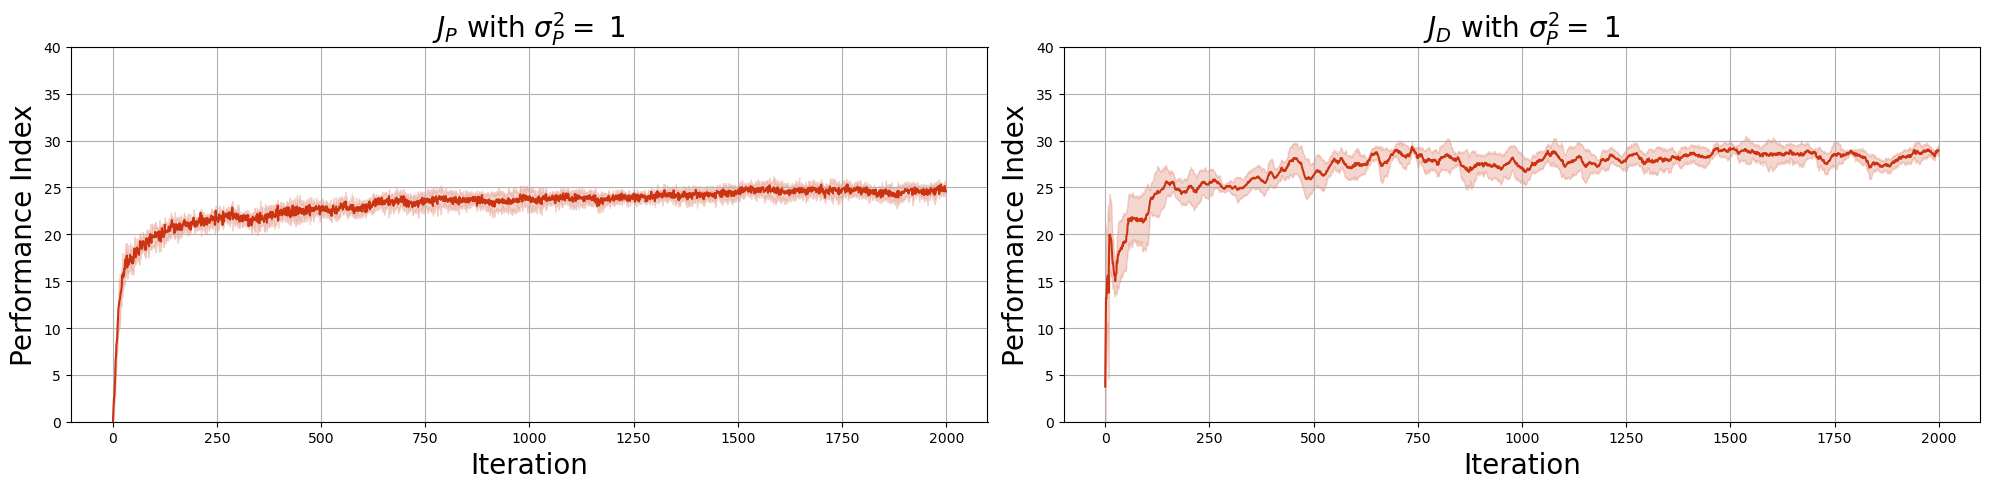

In [9]:
plt.clf()
fig, axs = plt.subplots(nrows=len(vars), ncols=2, figsize=(20, 5*len(vars)))
x = np.arange(int(ite))

curves = []
devs = []
labels = []
for i, elem in enumerate(Jd_pgpe):
    curves.append(Jp[i][:ite])
    devs.append(p_sigma[i][:ite])
    labels.append(f"$J_P$ with $\\sigma_P^2 = $ {sigmas[i]}")
    
    curves.append(Jd_pgpe[i][:ite])
    devs.append(d_sigma_pgpe[i][:ite])
    labels.append(f"$J_D$ with $\\sigma_P^2 = $ {sigmas[i]}")

for i, ax in enumerate(axs.flat):
    ax.plot(x, curves[i], color=(204/256., 51/256., 17/256.))
    ax.fill_between(x, curves[i] - devs[i], curves[i] + devs[i], alpha=0.2, color=(204/256, 51/256, 17/256))
    ax.set_xlabel("Iteration", fontsize=20)
    ax.set_ylabel("Performance Index", fontsize=20)
    ax.set_title(labels[i], fontsize=20)
    if ENV == "ant" and POL == "linear":
        ax.set_ylim(-100, 100)
    elif ENV == "half_cheetah" and POL == "linear":
        ax.set_ylim(-150, 220)
    elif ENV == "hopper":
        ax.set_ylim(0, 280)
    elif ENV == "swimmer":
        if H == "100":
            ax.set_ylim(0, 40)
        else:
            ax.set_ylim(-10, 70)
    ax.grid()
plt.tight_layout()
# plt.show()
# tikzplotlib.save(f"/Users/ale/Desktop/pgpe_{ENV}_{POL}_curves.tex")
plt.savefig(f"/Users/ale/Desktop/pgpe_{ENV}_{POL}_curves.pdf")

### PG

In [10]:
base_path = "/Users/ale/results/new_server_results/pg/"
if POL == "linear":
    pol = "gaussian"
else:
    pol = "deep_gaussian"

Ja = []
Jd_pg = []
a_sigma = []
d_sigma_pg = []

for elem in vars:
    path = f"pg_{ITE}_{ENV}_{H}_adam_001_{pol}_batch_100_{CLIP}_{PARAMS}_var_{elem}/"
    path += f"pg_{ITE}_{ENV}_{H}_adam_001_{pol}_batch_100_{CLIP}_{PARAMS}_var_{elem}_trial_"
    data = []
    performances = []
    det_performances = []
    for i in range(N_TRIALS):
        name = base_path + path + f"{i}/pg_results.json"
        file = open(name)
        data.append(json.load(file))
        performances.append(np.array(data[i]["performance"]))
        det_performances.append(np.array(data[i]["performance_det"]))
    Ja.append(np.mean(performances, axis=0))
    Jd_pg.append(np.mean(det_performances, axis=0))
    a_sigma.append(np.std(performances, axis=0) / np.sqrt(N_TRIALS) * 1.96)
    d_sigma_pg.append(np.std(det_performances, axis=0) / np.sqrt(N_TRIALS) * 1.96)

<Figure size 640x480 with 0 Axes>

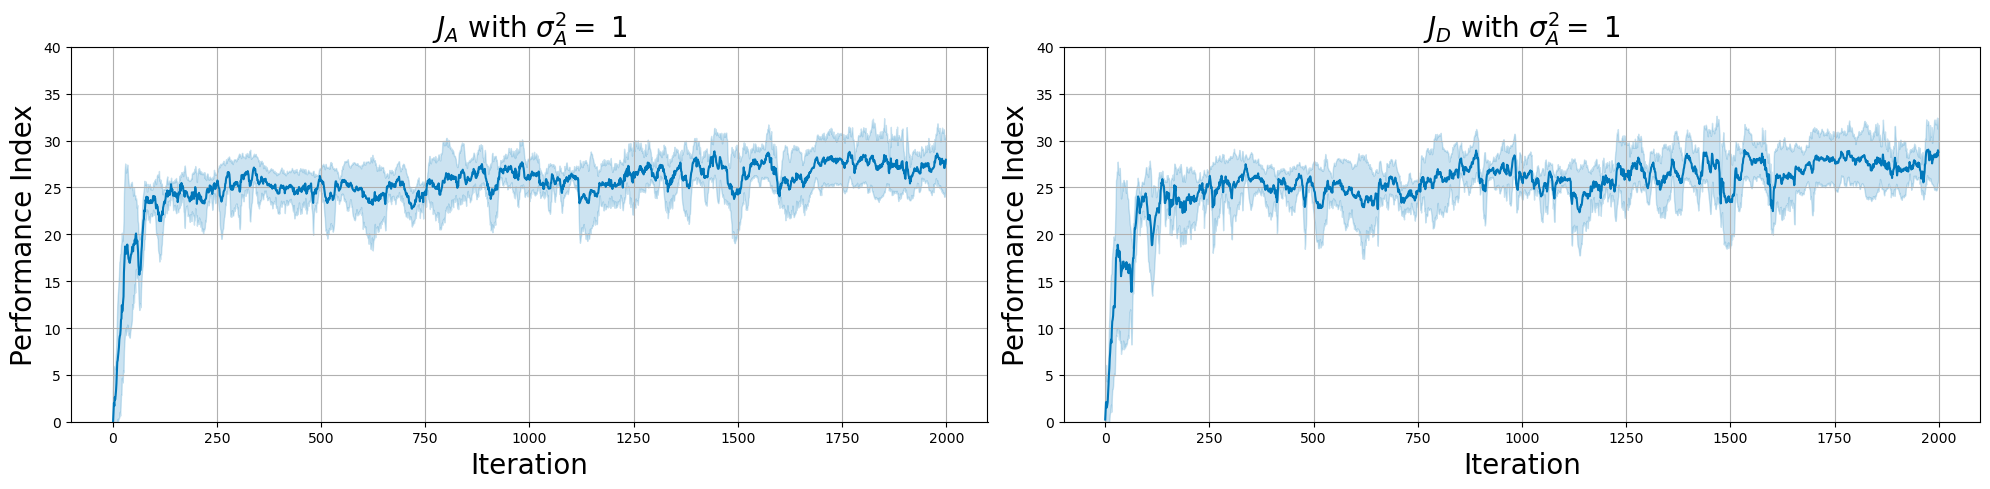

In [11]:
plt.clf()
fig, axs = plt.subplots(nrows=len(vars), ncols=2, figsize=(20, 5*len(vars)))
x = np.arange(int(ite))

curves = []
devs = []
labels = []
for i, elem in enumerate(Jd_pg):
    curves.append(Ja[i][:ite])
    devs.append(a_sigma[i][:ite])
    labels.append(f"$J_A$ with $\\sigma_A^2 = $ {sigmas[i]}")
    
    curves.append(Jd_pg[i][:ite])
    devs.append(d_sigma_pg[i][:ite])
    labels.append(f"$J_D$ with $\\sigma_A^2 = $ {sigmas[i]}")

for i, ax in enumerate(axs.flat):
    ax.plot(x, curves[i], color=(0/256., 119/256., 187/256.))
    ax.fill_between(x, curves[i] - devs[i], curves[i] + devs[i], alpha=0.2, color=(0/256., 119/256., 187/256.))
    ax.set_xlabel("Iteration", fontsize=20)
    ax.set_ylabel("Performance Index", fontsize=20)
    ax.set_title(labels[i], fontsize=20)
    if ENV == "ant" and POL == "linear":
        ax.set_ylim(-100, 100)
    elif ENV == "half_cheetah" and POL == "linear":
        ax.set_ylim(-150, 220)
    elif ENV == "hopper":
        ax.set_ylim(0, 280)
    elif ENV == "swimmer":
        if H == "100":
            ax.set_ylim(0, 40)
        else:
            ax.set_ylim(-10, 70)
    ax.grid()
plt.tight_layout()
# plt.show()
# tikzplotlib.save(f"/Users/ale/Desktop/pg_{ENV}_{POL}_curves.tex")
plt.savefig(f"/Users/ale/Desktop/pg_{ENV}_{POL}_curves.pdf")

## Comparison

<Figure size 640x480 with 0 Axes>

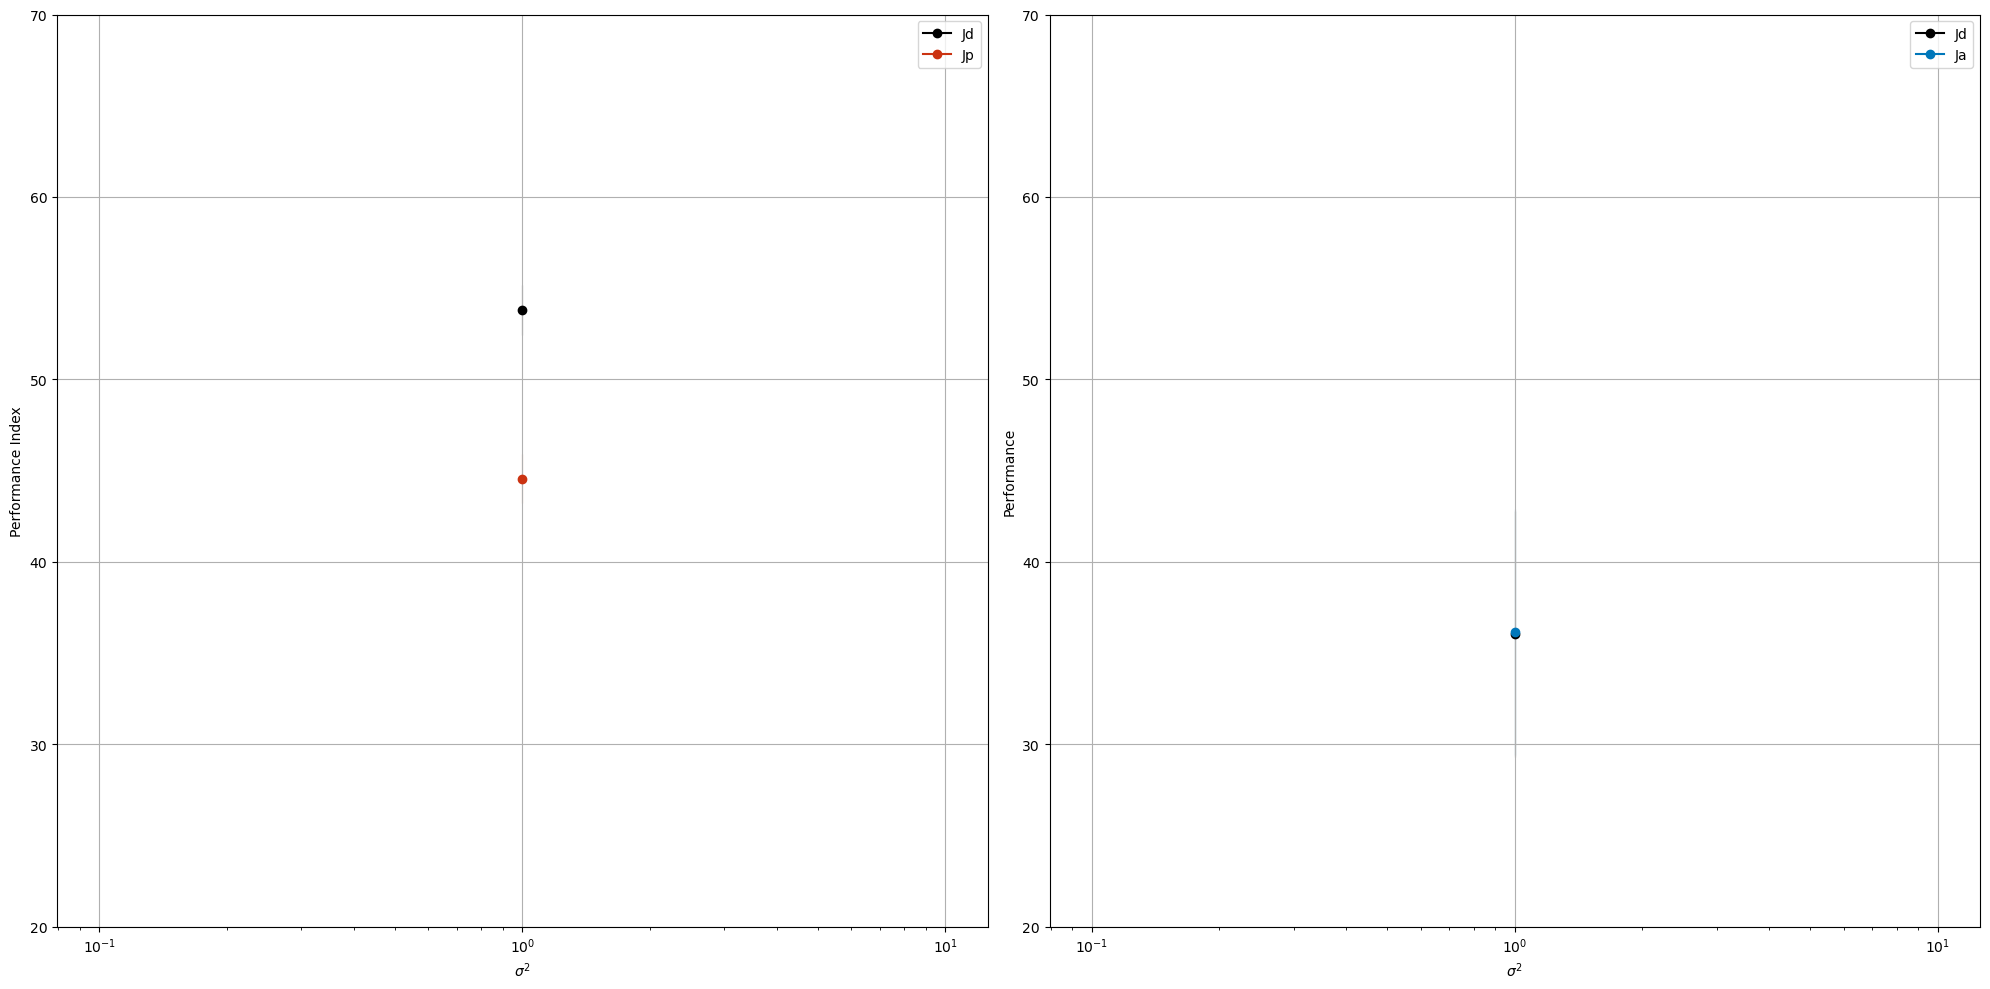

In [87]:
pg_last_det = np.zeros(len(sigmas))
pg_last_det_devs = np.zeros(len(sigmas))

pg_last = np.zeros(len(sigmas))
pg_last_devs = np.zeros(len(sigmas))

pgpe_last_det = np.zeros(len(sigmas))
pgpe_last_det_devs = np.zeros(len(sigmas))

pgpe_last = np.zeros(len(sigmas))
pgpe_last_devs = np.zeros(len(sigmas))

for i, sigma in enumerate(sigmas):
    pg_last_det[i] = np.mean(Jd_pg[i][-100:])
    pg_last_det_devs[i] = np.mean(d_sigma_pg[i][-100:])
    
    pgpe_last_det[i] = np.mean(Jd_pgpe[i][-100:])
    pgpe_last_det_devs[i] = np.mean(d_sigma_pgpe[i][-100:])
    
    pg_last[i] = np.mean(Ja[i][-100:])
    pg_last_devs[i] = np.mean(a_sigma[i][-100:])
    
    pgpe_last[i] = np.mean(Jp[i][-100:])
    pgpe_last_devs[i] = np.mean(p_sigma[i][-100:])
    
plt.clf()
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].plot(sigmas, pgpe_last_det, "o-", color="black", label="Jd")
axs[0].fill_between(sigmas, pgpe_last_det - pgpe_last_det_devs, pgpe_last_det + pgpe_last_det_devs, color="black", alpha=0.2)
axs[0].plot(sigmas, pgpe_last, "o-", color=(204/256., 51/256., 17/256.), label="Jp")
axs[0].fill_between(sigmas, pgpe_last - pgpe_last_devs, pgpe_last + pgpe_last_devs, color=(204/256., 51/256., 17/256.), alpha=0.2)
axs[0].set_xscale("log")
axs[0].grid()
axs[0].legend(loc="best")
axs[0].set_xlabel("$\\sigma^2$")
axs[0].set_ylabel("Performance Index")
if ENV == "hopper":
    axs[0].set_ylim(150, 260)
elif ENV == "swimmer":
    axs[0].set_ylim(20, 70)
elif ENV == "half_cheetah":
    axs[0].set_ylim(-100, 200)
elif ENV == "ant":
    if POL == "nn":
        axs[0].set_ylim(-75, -15)

axs[1].plot(sigmas, pg_last_det, "o-", color="black", label="Jd")
axs[1].fill_between(sigmas, pg_last_det - pg_last_det_devs, pg_last_det + pg_last_det_devs, color="black", alpha=0.2)
axs[1].plot(sigmas, pg_last, "o-", color=(0/256., 119/256., 187/256.), label="Ja")
axs[1].fill_between(sigmas, pg_last - pg_last_devs, pg_last + pg_last_devs, color=(0/256., 119/256., 187/256.), alpha=0.2)
axs[1].set_xscale("log")
axs[1].grid()
axs[1].legend(loc="best")
axs[1].set_xlabel("$\\sigma^2$")
axs[1].set_ylabel("Performance")
if ENV == "hopper":
    axs[1].set_ylim(150, 260)
elif ENV == "swimmer":
    axs[1].set_ylim(20, 70)
elif ENV == "half_cheetah":
    axs[1].set_ylim(-100, 200)
elif ENV == "ant":
    if POL == "nn":
        axs[1].set_ylim(-75, -15)

plt.tight_layout()
plt.show()

In [ ]:
"""plt.clf()
plt.plot(sigmas, pgpe_last_det, "o-", color="black", label="$J_{D}(\\theta_{K})$")
plt.fill_between(sigmas, pgpe_last_det - pgpe_last_det_devs, pgpe_last_det + pgpe_last_det_devs, color="black", alpha=0.2)
plt.plot(sigmas, pgpe_last, "o-", color=(204/256., 51/256., 17/256.), label="$J_{P}(\\theta_{K})$")
plt.fill_between(sigmas, pgpe_last - pgpe_last_devs, pgpe_last + pgpe_last_devs, color=(204/256., 51/256., 17/256.), alpha=0.2)
plt.xscale("log")
plt.grid()
# plt.legend(loc="best")
plt.xlabel("$\\sigma_{P}^2$")
plt.ylabel("Performance Index")
if ENV == "hopper":
    plt.ylim(150, 260)
elif ENV == "swimmer":
    plt.ylim(20, 70)
elif ENV == "half_cheetah":
    plt.ylim(-100, 200)
tikzplotlib.save(f"/Users/ale/Desktop/var_study_pgpe_{ENV}.tex")

plt.clf()
plt.plot(sigmas, pg_last_det, "o-", color="black", label="$J_{D}(\\theta_{K})$")
plt.fill_between(sigmas, pg_last_det - pg_last_det_devs, pg_last_det + pg_last_det_devs, color="black", alpha=0.2)
plt.plot(sigmas, pg_last, "o-", color=(0/256., 119/256., 187/256.), label="$J_{A}(\\theta_{K})$")
plt.fill_between(sigmas, pg_last - pg_last_devs, pg_last + pg_last_devs, color=(0/256., 119/256., 187/256.), alpha=0.2)
plt.xscale("log")
plt.grid()
# plt.legend(loc="best")
plt.xlabel("$\\sigma_{A}^2$")
plt.ylabel("Performance Index")
if ENV == "hopper":
    plt.ylim(150, 260)
elif ENV == "swimmer":
    plt.ylim(20, 70)
elif ENV == "half_cheetah":
    plt.ylim(-100, 200)
tikzplotlib.save(f"/Users/ale/Desktop/var_study_pg_{ENV}.tex")"""

'plt.clf()\nplt.plot(sigmas, pgpe_last_det, "o-", color="black", label="$J_{D}(\\theta_{K})$")\nplt.fill_between(sigmas, pgpe_last_det - pgpe_last_det_devs, pgpe_last_det + pgpe_last_det_devs, color="black", alpha=0.2)\nplt.plot(sigmas, pgpe_last, "o-", color=(204/256., 51/256., 17/256.), label="$J_{P}(\\theta_{K})$")\nplt.fill_between(sigmas, pgpe_last - pgpe_last_devs, pgpe_last + pgpe_last_devs, color=(204/256., 51/256., 17/256.), alpha=0.2)\nplt.xscale("log")\nplt.grid()\n# plt.legend(loc="best")\nplt.xlabel("$\\sigma_{P}^2$")\nplt.ylabel("Performance Index")\nif ENV == "hopper":\n    plt.ylim(150, 260)\nelif ENV == "swimmer":\n    plt.ylim(20, 70)\nelif ENV == "half_cheetah":\n    plt.ylim(-100, 200)\ntikzplotlib.save(f"/Users/ale/Desktop/var_study_pgpe_{ENV}.tex")\n\nplt.clf()\nplt.plot(sigmas, pg_last_det, "o-", color="black", label="$J_{D}(\\theta_{K})$")\nplt.fill_between(sigmas, pg_last_det - pg_last_det_devs, pg_last_det + pg_last_det_devs, color="black", alpha=0.2)\nplt.plo

In [ ]:
pg_last_devs

array([11.42463537, 11.20065678, 11.02346233,  0.4749148 ,  0.16820701])